Libro Mayor:
  Num       Fecha                Cuenta Debe Haber
0   1  2022-01-01                  Caja  320     0
1   1  2022-01-01            Caja Chica   60     0
2   1  2022-01-01              Caja U$S    0     0
3   1  2022-01-01            Caja Euros    0     0
4   1  2022-01-01  Banco Nación Cta Cte  688     0
5   1  2023-08-02                Ventas    0     0
6   1  2023-08-05               Compras    0     0
7   1  2023-08-10                  Caja    0     0
8   1  2023-08-15                Ventas    0     0
9   1  2023-08-20                Gastos    0     0

Balance de Sumas y Saldos:
                      Debe  Haber  Saldo
Cuenta                                  
Banco Nación Cta Cte   688      0    688
Caja                   320      0    320
Caja Chica              60      0     60
Caja Euros               0      0      0
Caja U$S                 0      0      0
Compras                  0      0      0
Gastos                   0      0      0
Ventas                   0   

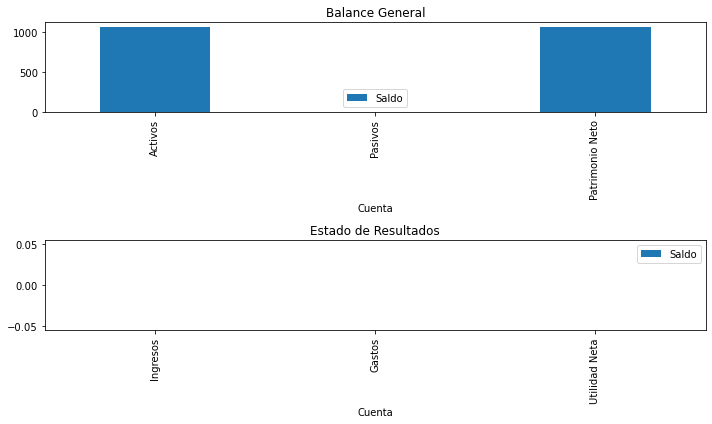

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame para el Libro Mayor
libro_mayor = pd.DataFrame(columns=["Num",'Fecha', 'Cuenta', 'Debe', 'Haber'])

# Función para agregar asientos contables al Libro Mayor
def agregar_asiento_contable(num, fecha, cuenta, debe, haber):
    global libro_mayor
    libro_mayor = libro_mayor.append({"Num": num, 'Fecha': fecha, 'Cuenta': cuenta, 'Debe': debe, 'Haber': haber}, ignore_index=True)

# Agregar asientos contables al Libro Mayor
agregar_asiento_contable(1, '2022-01-01', 'Caja', 320, 0)
agregar_asiento_contable(1, '2022-01-01', 'Caja Chica', 60, 0)
agregar_asiento_contable(1, '2022-01-01', 'Caja U$S', 0, 0)
agregar_asiento_contable(1, '2022-01-01', 'Caja Euros', 0, 0)
agregar_asiento_contable(1, '2022-01-01', 'Banco Nación Cta Cte', 688, 0)
agregar_asiento_contable(1, '2023-08-02', 'Ventas', 0, 000)
agregar_asiento_contable(1, '2023-08-05', 'Compras', 000, 0)
agregar_asiento_contable(1, '2023-08-10', 'Caja', 0, 00)
agregar_asiento_contable(1, '2023-08-15', 'Ventas', 0, 000)
agregar_asiento_contable(1, '2023-08-20', 'Gastos', 00, 0)

# Generar el Balance de Sumas y Saldos
balance_sumas_saldos = libro_mayor.groupby('Cuenta').sum()[['Debe', 'Haber']]

# Calcular los saldos
balance_sumas_saldos['Saldo'] = balance_sumas_saldos['Debe'] - balance_sumas_saldos['Haber']

# Crear el Balance General (simplificado)
activos = balance_sumas_saldos.loc['Banco Nación Cta Cte':'Caja Euros', 'Saldo'].sum()
pasivos = balance_sumas_saldos.loc['Ventas':'Gastos', 'Saldo'].sum()
patrimonio = activos - pasivos
balance_general = pd.DataFrame({'Cuenta': ['Activos', 'Pasivos', 'Patrimonio Neto'],
                                'Saldo': [activos, pasivos, patrimonio]})

# Crear el Estado de Resultados (simplificado)
ingresos = balance_sumas_saldos.loc['Ventas', 'Saldo']
gastos = balance_sumas_saldos.loc['Gastos', 'Saldo']
utilidad_neta = ingresos - gastos
estado_resultados = pd.DataFrame({'Cuenta': ['Ingresos', 'Gastos', 'Utilidad Neta'],
                                  'Saldo': [ingresos, gastos, utilidad_neta]})

# Imprimir resultados
print("Libro Mayor:")
print(libro_mayor)

print("\nBalance de Sumas y Saldos:")
print(balance_sumas_saldos)

print("\nBalance General:")
print(balance_general)

print("\nEstado de Resultados:")
print(estado_resultados)

# Graficar el Balance General y el Estado de Resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
balance_general.plot(kind='bar', x='Cuenta', y='Saldo', ax=plt.gca())
plt.title("Balance General")

plt.subplot(2, 1, 2)
estado_resultados.plot(kind='bar', x='Cuenta', y='Saldo', ax=plt.gca())
plt.title("Estado de Resultados")

plt.tight_layout()
plt.show()
